In [8]:
from os import listdir
from os.path import isfile, join
import json
import pandas as pd
import datetime
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})

In [3]:
mypath = "../data/revisions/"
file = "rev_kash_en_27-10-2019 21-52-24.json"

with open(mypath + file) as thefile:
        data = json.load(thefile)
        df = pd.DataFrame(data)

In [12]:
type(data)

list

In [4]:
df['timestamp'] = df['timestamp'].astype(str)
df.timestamp=df.timestamp.str.replace("T"," ")
df.timestamp=df.timestamp.str.replace("Z","")
# df.to_csv(r'kash_hi.csv')
print(df[:3])

         user            timestamp    size  \
0   Kautilya3  2019-10-23 16:37:44  365153   
1  Montysumit  2019-10-23 16:31:47  365263   
2  Montysumit  2019-10-23 16:22:07  365153   

                                             comment anon  
0  Reverted 2 edits by [[Special:Contributions/Mo...  NaN  
1  Facts presented more properly. If this doesn't...  NaN  
2  Those cites quoted are partially or fully fund...  NaN  


In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['size'] = pd.to_numeric(df['size'])
df.dtypes
df = df.set_index('timestamp')

In [6]:
# df = df.set_index('timestamp')
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.weekday_name
df.dtypes
df.head(3)

,user,size,comment,anon,year,month,day
timestamp,,,,,,,
2019-10-23 16:37:44,Kautilya3,365153,Reverted 2 edits by [[Special:Contributions/Mo...,NaN,2019,10,Wednesday
2019-10-23 16:31:47,Montysumit,365263,Facts presented more properly. If this doesn't...,NaN,2019,10,Wednesday
2019-10-23 16:22:07,Montysumit,365153,Those cites quoted are partially or fully fund...,NaN,2019,10,Wednesday


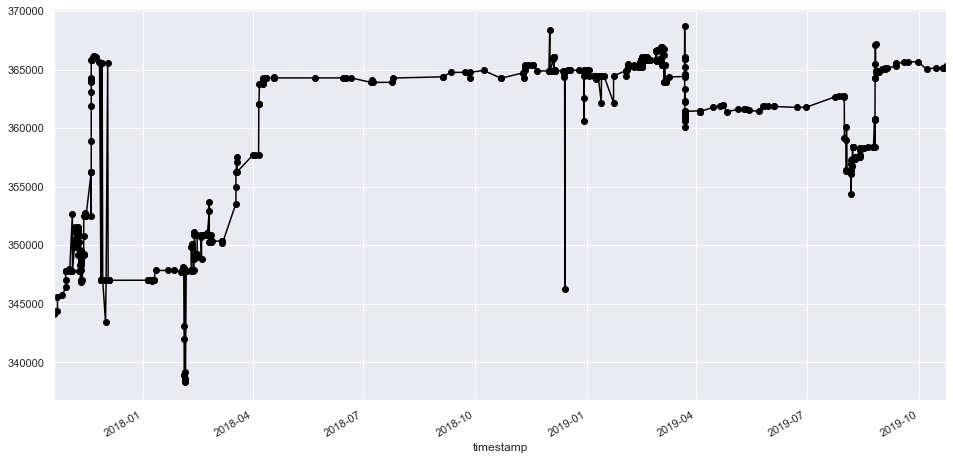

In [9]:
df['size'].plot(marker='o', linestyle='-', linewidth=1.5, color = 'black')

In [12]:
df = df.drop(['user','comment'], axis=1)
df.dtypes
df.to_csv(r'kash_en.csv')